Based on code examples from Michael Waskom and from the Seaborn documentation

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Anscombe

<class 'pandas.core.frame.DataFrame'>
   count      mean       std  min     25%   50%      75%    max
x   44.0  9.000000  3.198837  4.0  7.0000  8.00  11.0000  19.00
y   44.0  7.500682  1.958925  3.1  6.1175  7.52   8.7475  12.74


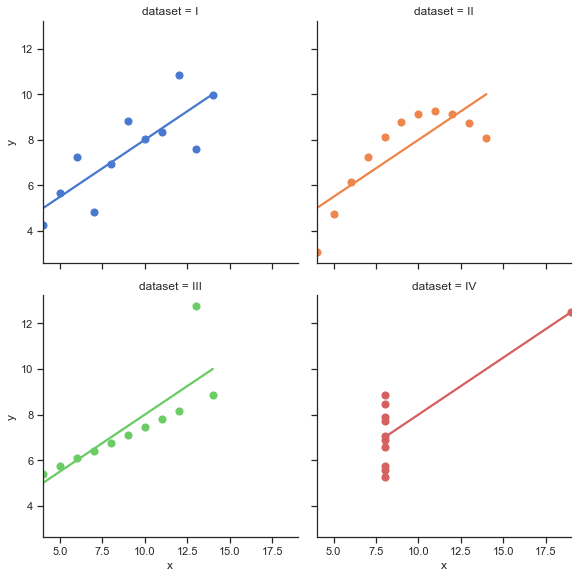

In [12]:
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
print(type(df))
print(df.describe().T)
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

### Timeseries plot with error bands

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

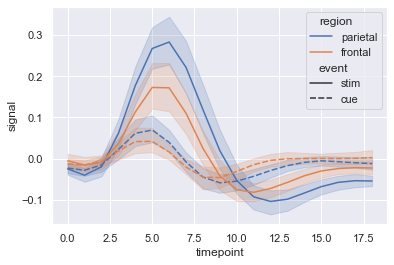

In [13]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

### Seaborn.Jointplot( )

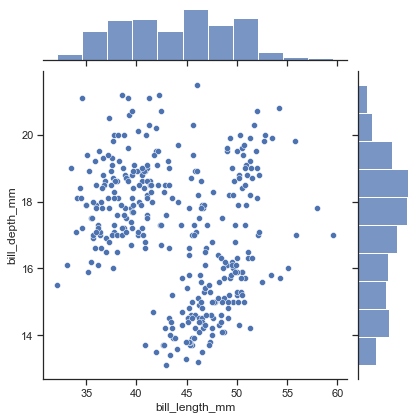

In [15]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

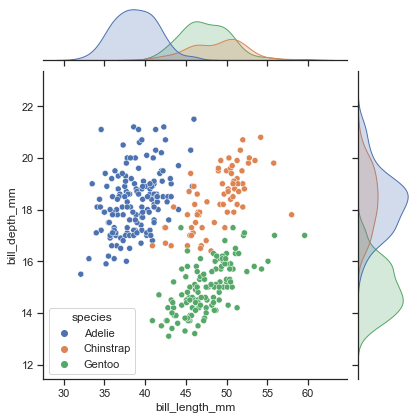

In [16]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

Note that in the following code a reference to the JointGrid object is obtained and methods of that object are called on the succeeding lines.

<class 'seaborn.axisgrid.JointGrid'>


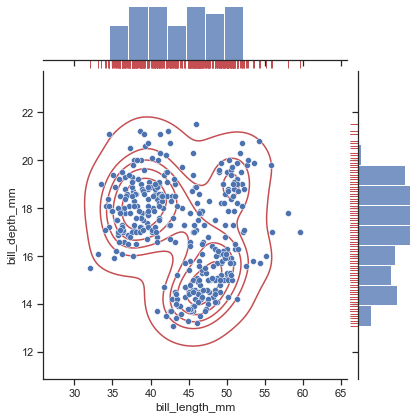

In [18]:
g = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
print(type(g))
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

### jointplot( ) - Hexbin plot with marginal distributions

In [ ]:
"""
Linear regression with marginal distributions
=============================================

_thumb: .65, .65
"""
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

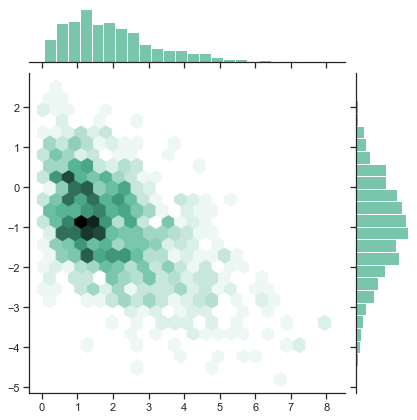

In [14]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

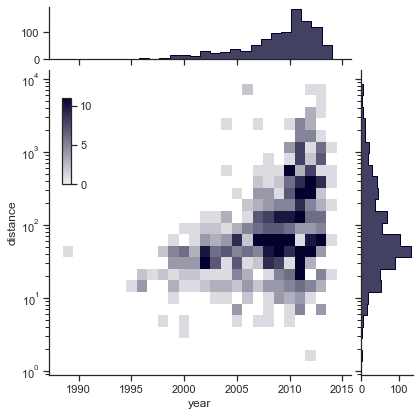

In [20]:
"""
Joint and marginal histograms
=============================

_thumb: .52, .505

"""
import seaborn as sns
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.fig.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

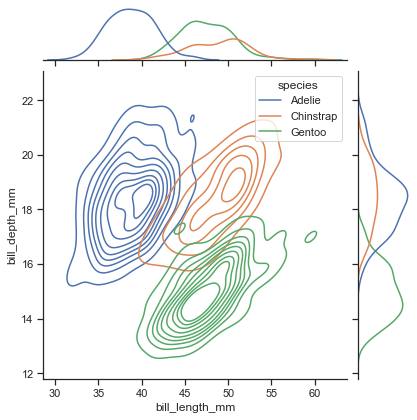

In [21]:
"""
Joint kernel density estimate
=============================

_thumb: .6, .4
"""
import seaborn as sns
sns.set_theme(style="ticks")

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


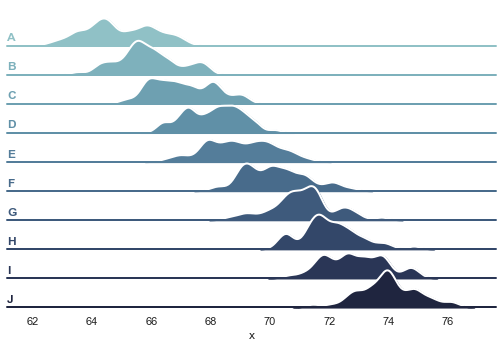

In [22]:
"""
Overlapping densities ('ridge plot')
====================================


"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)


<AxesSubplot:xlabel='clarity', ylabel='carat'>

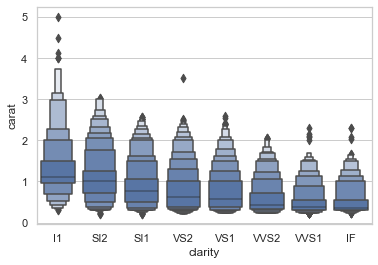

In [24]:
"""
Plotting large distributions
============================

"""
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(x="clarity", y="carat",
              color="b", order=clarity_ranking,
              scale="linear", data=diamonds)

<AxesSubplot:>

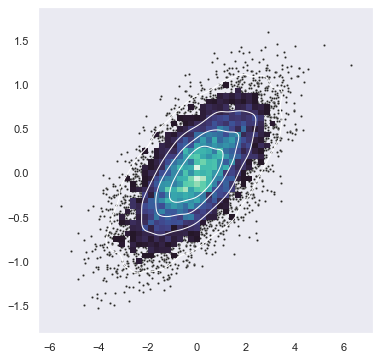

In [25]:
"""
Bivariate plot with multiple elements
=====================================


"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)


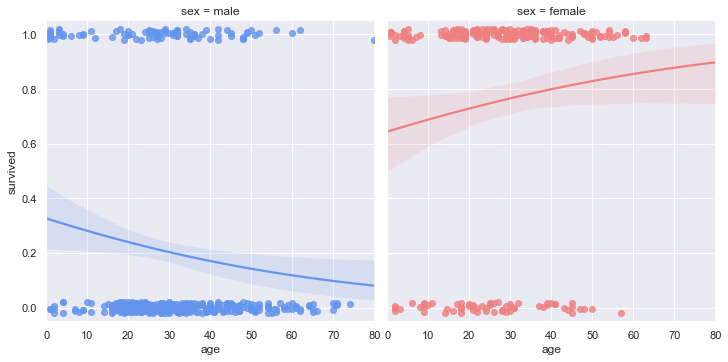

In [26]:
"""
Faceted logistic regression
===========================

_thumb: .58, .5
"""
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load the example Titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))


### Random Walks

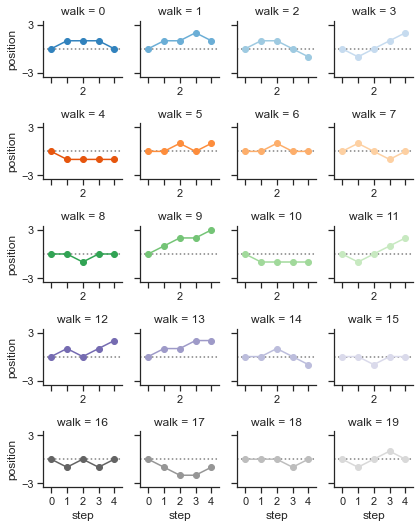

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

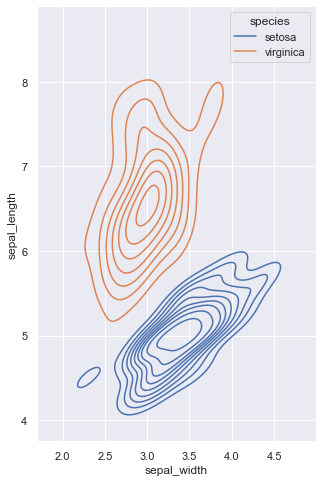

In [28]:
"""
Multiple bivariate KDE plots
============================

_thumb: .6, .45
"""
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
iris = sns.load_dataset("iris")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1,
)


ECDF is the estimate of the cumulative distribution function

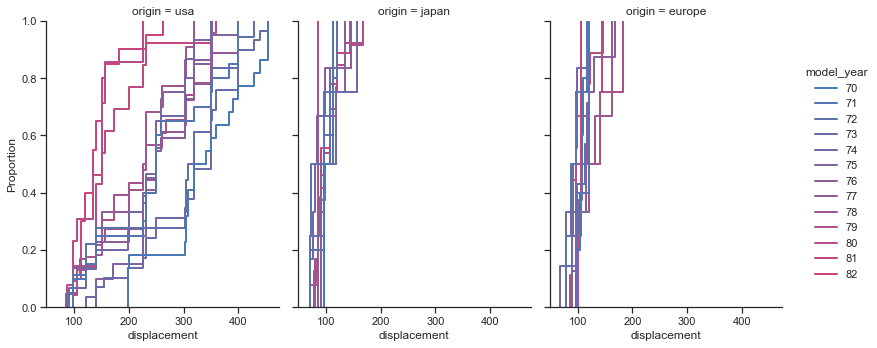

In [29]:
import seaborn as sns
sns.set_theme(style="ticks")
mpg = sns.load_dataset("mpg")

colors = (250, 70, 50), (350, 70, 50)
cmap = sns.blend_palette(colors, input="husl", as_cmap=True)
sns.displot(
    mpg,
    x="displacement", col="origin", hue="model_year",
    kind="ecdf", aspect=.75, linewidth=2, palette=cmap,
)


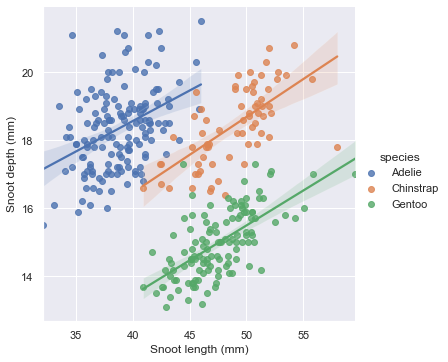

In [30]:
"""
Multiple linear regression
==========================

_thumb: .45, .45
"""
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")


### Category Plot (ANOVA)

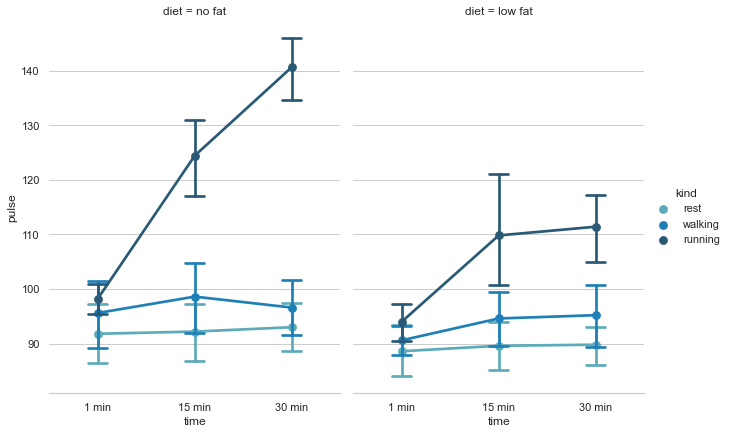

In [31]:
"""
Plotting a three-way ANOVA
==========================

_thumb: .42, .5
"""
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example exercise dataset
df = sns.load_dataset("exercise")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="time", y="pulse", hue="kind", col="diet",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df)
g.despine(left=True)


Jitter Stripplot

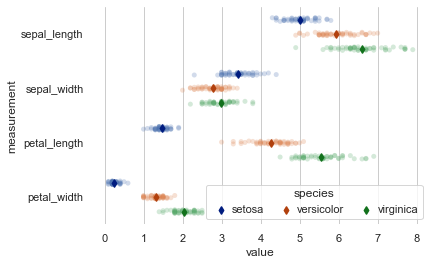

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

<AxesSubplot:>

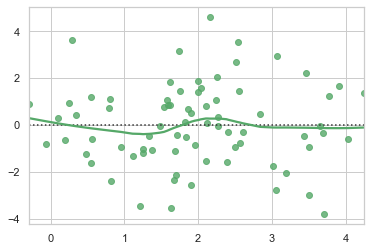

In [35]:

"""
Plotting model residuals
========================

"""
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color="g")

[Text(0, 0.5, '')]

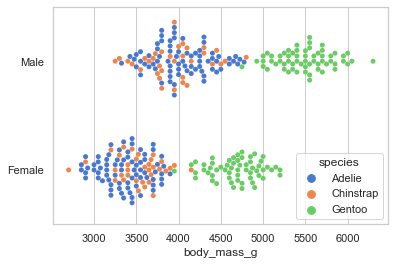

In [36]:
"""
Scatterplot with categorical variables
======================================

_thumb: .45, .45

"""
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="body_mass_g", y="sex", hue="species")
ax.set(ylabel="")
